In [1]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import statistics as st
from scipy import stats
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, Bidirectional, LSTM
from tensorflow.python.keras import regularizers

#import sys
#!{sys.executable} -m pip install keras-rectified-adam

# Import custom functions
from preprocessing import *
from model import *
from evaluation import *

/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/Cellar/jupy

In [2]:
# List of X_files
X_files = ['TrainingData/subject_001_01__x.csv', 'TrainingData/subject_001_02__x.csv', 
           'TrainingData/subject_001_03__x.csv', 'TrainingData/subject_001_04__x.csv', 
           'TrainingData/subject_001_05__x.csv', 'TrainingData/subject_001_06__x.csv', 
           'TrainingData/subject_001_07__x.csv', 'TrainingData/subject_001_08__x.csv',
           'TrainingData/subject_002_01__x.csv', 'TrainingData/subject_002_02__x.csv',
           'TrainingData/subject_002_04__x.csv', 'TrainingData/subject_002_05__x.csv', 
           'TrainingData/subject_003_01__x.csv', 'TrainingData/subject_003_02__x.csv', 
           'TrainingData/subject_004_02__x.csv', 'TrainingData/subject_005_01__x.csv', 
           'TrainingData/subject_005_02__x.csv', 'TrainingData/subject_005_03__x.csv', 
           'TrainingData/subject_006_01__x.csv', 'TrainingData/subject_006_02__x.csv', 
           'TrainingData/subject_006_03__x.csv', 'TrainingData/subject_007_02__x.csv', 
           'TrainingData/subject_007_03__x.csv', 'TrainingData/subject_007_04__x.csv',
           'TrainingData/subject_008_01__x.csv']
val_X_files = ['TrainingData/subject_002_03__x.csv', 'TrainingData/subject_004_01__x.csv']
test_X_files = ['TrainingData/subject_003_03__x.csv', 'TrainingData/subject_007_01__x.csv']

# List of X_t_files
X_t_files = ['TrainingData/subject_001_01__x_time.csv', 'TrainingData/subject_001_02__x_time.csv', 
             'TrainingData/subject_001_03__x_time.csv', 'TrainingData/subject_001_04__x_time.csv', 
             'TrainingData/subject_001_05__x_time.csv', 'TrainingData/subject_001_06__x_time.csv', 
             'TrainingData/subject_001_07__x_time.csv', 'TrainingData/subject_001_08__x_time.csv',
             'TrainingData/subject_002_01__x_time.csv', 'TrainingData/subject_002_02__x_time.csv',
             'TrainingData/subject_002_04__x_time.csv', 'TrainingData/subject_002_05__x_time.csv', 
             'TrainingData/subject_003_01__x_time.csv', 'TrainingData/subject_003_02__x_time.csv', 
             'TrainingData/subject_004_02__x_time.csv', 'TrainingData/subject_005_01__x_time.csv', 
             'TrainingData/subject_005_02__x_time.csv', 'TrainingData/subject_005_03__x_time.csv', 
             'TrainingData/subject_006_01__x_time.csv', 'TrainingData/subject_006_02__x_time.csv', 
             'TrainingData/subject_006_03__x_time.csv', 'TrainingData/subject_007_02__x_time.csv', 
             'TrainingData/subject_007_03__x_time.csv', 'TrainingData/subject_007_04__x_time.csv',
             'TrainingData/subject_008_01__x_time.csv']
val_X_t_files = ['TrainingData/subject_002_03__x_time.csv', 'TrainingData/subject_004_01__x_time.csv']
test_X_t_files = ['TrainingData/subject_003_03__x_time.csv', 'TrainingData/subject_007_01__x_time.csv']

# List of training y_files
y_files = ['TrainingData/subject_001_01__y.csv', 'TrainingData/subject_001_02__y.csv', 
           'TrainingData/subject_001_03__y.csv', 'TrainingData/subject_001_04__y.csv', 
           'TrainingData/subject_001_05__y.csv', 'TrainingData/subject_001_06__y.csv', 
           'TrainingData/subject_001_07__y.csv', 'TrainingData/subject_001_08__y.csv',
           'TrainingData/subject_002_01__y.csv', 'TrainingData/subject_002_02__y.csv',
           'TrainingData/subject_002_04__y.csv', 'TrainingData/subject_002_05__y.csv', 
           'TrainingData/subject_003_01__y.csv', 'TrainingData/subject_003_02__y.csv',
           'TrainingData/subject_004_02__y.csv', 'TrainingData/subject_005_01__y.csv', 
           'TrainingData/subject_005_02__y.csv', 'TrainingData/subject_005_03__y.csv', 
           'TrainingData/subject_006_01__y.csv', 'TrainingData/subject_006_02__y.csv', 
           'TrainingData/subject_006_03__y.csv', 'TrainingData/subject_007_02__y.csv', 
           'TrainingData/subject_007_03__y.csv', 'TrainingData/subject_007_04__y.csv',
           'TrainingData/subject_008_01__y.csv']
val_y_files = ['TrainingData/subject_002_03__y.csv', 'TrainingData/subject_004_01__y.csv']
test_y_files = ['TrainingData/subject_003_03__y.csv', 'TrainingData/subject_007_01__y.csv']

# List of training y_t_files
y_t_files = ['TrainingData/subject_001_01__y_time.csv', 'TrainingData/subject_001_02__y_time.csv', 
             'TrainingData/subject_001_03__y_time.csv', 'TrainingData/subject_001_04__y_time.csv', 
             'TrainingData/subject_001_05__y_time.csv', 'TrainingData/subject_001_06__y_time.csv', 
             'TrainingData/subject_001_07__y_time.csv', 'TrainingData/subject_001_08__y_time.csv',
             'TrainingData/subject_002_01__y_time.csv', 'TrainingData/subject_002_02__y_time.csv',
             'TrainingData/subject_002_04__y_time.csv', 'TrainingData/subject_002_05__y_time.csv', 
             'TrainingData/subject_003_01__y_time.csv', 'TrainingData/subject_003_02__y_time.csv',
             'TrainingData/subject_004_02__y_time.csv', 'TrainingData/subject_005_01__y_time.csv', 
             'TrainingData/subject_005_02__y_time.csv', 'TrainingData/subject_005_03__y_time.csv', 
             'TrainingData/subject_006_01__y_time.csv', 'TrainingData/subject_006_02__y_time.csv', 
             'TrainingData/subject_006_03__y_time.csv', 'TrainingData/subject_007_02__y_time.csv', 
             'TrainingData/subject_007_03__y_time.csv', 'TrainingData/subject_007_04__y_time.csv',
             'TrainingData/subject_008_01__y_time.csv']
val_y_t_files = ['TrainingData/subject_002_03__y_time.csv', 'TrainingData/subject_004_01__y_time.csv']
test_y_t_files = ['TrainingData/subject_003_03__y_time.csv', 'TrainingData/subject_007_01__y_time.csv']

training_X, training_y = generate_data(X_files, X_t_files, y_files, y_t_files)
val_X, val_y = generate_data(val_X_files, val_X_t_files, val_y_files, val_y_t_files)
test_X, test_y = generate_data(test_X_files, test_X_t_files, test_y_files, test_y_t_files)
print(training_X.shape, training_y.shape)
print(val_X.shape, val_y.shape)
print(test_X.shape, test_y.shape)

(297454, 30, 6) (297454, 1)
(20716, 30, 6) (20716, 1)
(16373, 30, 6) (16373, 1)


In [3]:
# Save the training data to .npy files so we do not have to generate them repeatedly
np.save('training_X.npy', training_X)
np.save('training_y.npy', training_y)
np.save('val_X.npy', val_X)
np.save('val_y.npy', val_y)
np.save('test_X.npy', test_X)
np.save('test_y.npy', test_y)

In [4]:
# Loading the data back
training_X = np.load('training_X.npy')
training_y = np.load('training_y.npy')
val_X = np.load('val_X.npy')
val_y = np.load('val_y.npy')
test_X = np.load('test_X.npy')
test_y = np.load('test_y.npy')

In [5]:
# Get the class weights
label_weights = get_label_weights(training_X, training_y)

# Perform one-hot encoding
training_y_encoded = one_hot_encoding(training_y)
val_y_encoded = one_hot_encoding(val_y)

/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3], y=[0 0 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [6]:
n_timesteps, n_features, n_outputs = training_X.shape[1], training_X.shape[2], training_y_encoded.shape[1]
model = Sequential()
model.add(Bidirectional(LSTM(units = 125, kernel_regularizer = regularizers.l1_l2(l1 = 2**-6, l2 = 2**-8)),
                        input_shape = (n_timesteps, n_features)))
model.add(Dropout(rate = 0.3))
model.add(Dense(units = 125, activation = 'tanh'))
model.add(Dense(n_outputs, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', 
              metrics = ['acc', f1, precision_measure, recall_measure])

In [7]:
model.summary()
history = model.fit(training_X, training_y_encoded, epochs = 25, batch_size = 64, class_weight = label_weights, 
                    validation_data = (val_X, val_y_encoded), shuffle = False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 250)               132000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 504       
Total params: 163,879
Trainable params: 163,879
Non-trainable params: 0
_________________________________________________________________
Train on 297454 samples, validate on 20716 samples
Epoch 1/25
297454/297454 [==============================] - 392s 1ms/step - loss: 0.9607 - acc: 0.5481 - f1: 0.4145 - precision_measure: 0.5300 - recall_measure: 0.3768 - val_loss: 0.7941 - val_acc: 0.7847 - val_f1: 0

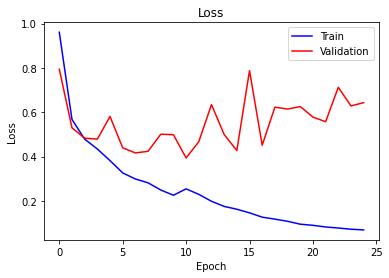

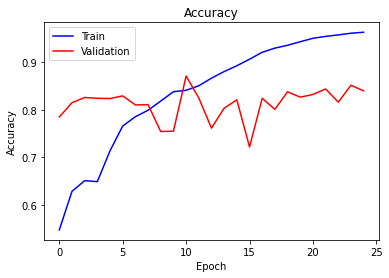

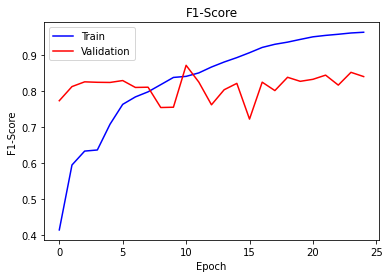

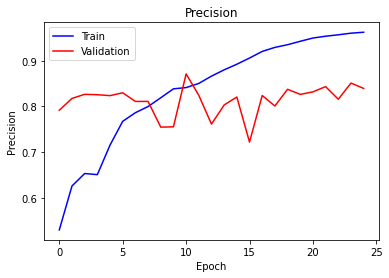

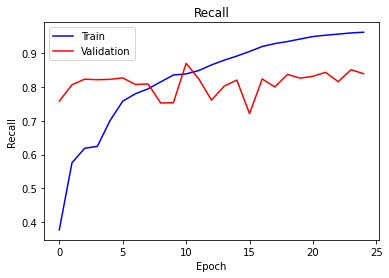

In [8]:
plot_history(history)

In [9]:
# Get prediction report
y_pred = model.predict(val_X, batch_size = 64, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)
print(classification_report(val_y, y_pred_bool))

20716/20716 [==============================] - 11s 532us/step
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     15600
           1       0.77      0.99      0.87       784
           2       0.90      0.99      0.94      1146
           3       0.52      0.83      0.64      3186

    accuracy                           0.84     20716
   macro avg       0.79      0.91      0.83     20716
weighted avg       0.88      0.84      0.85     20716



In [12]:
# Predict on our witheld test data
y_hat = model.predict(test_X, batch_size = 64, verbose = 1)
y_hat_bool = np.argmax(y_hat, axis = 1)
print(classification_report(test_y, y_hat_bool))

16373/16373 [==============================] - 8s 462us/step
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     11441
           1       0.80      1.00      0.89       376
           2       0.89      0.97      0.93       946
           3       0.93      0.46      0.62      3610

    accuracy                           0.86     16373
   macro avg       0.87      0.85      0.84     16373
weighted avg       0.87      0.86      0.84     16373



In [10]:
validation = pd.DataFrame({'Y':val_y.flatten(), 'Prediction':y_pred_bool})
validation = pd.DataFrame(list(zip(val_y.flatten(), y_pred_bool)), columns = ['Y', 'Prediction'])
validation.to_csv('validation_prediction.csv')

In [108]:
# Get predictions using test data
test_files = ['TestData/subject_009_01__x.csv', 'TestData/subject_010_01__x.csv', 
              'TestData/subject_011_01__x.csv', 'TestData/subject_012_01__x.csv']

test_time_files = ['TestData/subject_009_01__x_time.csv', 'TestData/subject_010_01__x_time.csv', 
              'TestData/subject_011_01__x_time.csv', 'TestData/subject_012_01__x_time.csv']

y_files = ['TestData/subject_009_01__y_time.csv', 'TestData/subject_010_01__y_time.csv',
           'TestData/subject_011_01__y_time.csv', 'TestData/subject_012_01__y_time.csv']

prediction_files = ['subject_009_01__y_prediction.csv', 'subject_010_01__y_prediction.csv',
                    'subject_011_01__y_prediction.csv', 'subject_012_01__y_prediction.csv']

In [109]:
def create_dataset(X, time_steps, step):
    X_values = []
    for i in range(0, len(X) - time_steps, step):
        value = X.iloc[i:(i + time_steps)].values
        X_values.append(value)        
    return np.array(X_values)

def get_majority(y):
    y_out = []
    for i in range(0, y.shape[0], 4):
        a = list(y[i:i+4])
        y_out.append(max(a, key = a.count))
    return np.array(y_out)

for i in range(len(test_files)):
    input_data = create_dataframe_X(test_files[i], test_time_files[i])
    df = input_data.drop(['Time stamp'], axis = 1)
    y_frame = pd.read_csv(y_files[i])
    to_add = y_frame.shape[0] * 4 - df.shape[0] + 30
    to_add_df = pd.DataFrame(df.iloc[-to_add:])
    df = df.append(to_add_df)
    X_test = create_dataset(df, 30, 1)
    y_test = model.predict(X_test, batch_size = 64, verbose = 1)
    y_test_bool = np.argmax(y_test, axis = 1)
    y_actual = get_majority(y_test_bool)
    print(y_actual.size)
    y_series = pd.Series(y_actual)
    y_series.to_csv("C2_predictions/" + prediction_files[i])

37988/37988 [==============================] - 10s 273us/step
9497
49076/49076 [==============================] - 21s 435us/step
12269
51756/51756 [==============================] - 15s 281us/step
12939
45316/45316 [==============================] - 28s 610us/step
11329
